# Introduction

Pour représenter une image, une possibilité est de lui superposer une grille, dont on appelle chaque case un $pixel$ (picture element). On colorie alors chaque case d'une couleur uniforme. Le résultat constitue une approximation plus ou moins fidèle d'image de départ. Plus la grille est fine, plus l'image sera lisse mais plus le nombre de données sera important.

Une image numérique peut donc être vue comme un tableau (matrice) dont les coefficients sont les valeurs des pixels. Chaque valeur est codée sur un certain nombre de bits selon le type de l'image. On parle donc de représentation $bitmap$ des images (carte de bits).

# Types d'images

- ***image en noir et blanc*** 

se traduit directement en une matrice de bits : 0 pour noir et 1 pour blanc. 

Si on veut introduire un peu plus de nuances, il faudra attribuer à chaque pixel un peu plus d'un bit.

- ***image en niveau de gris***

Dans ce cas, la valeur du pixel est généralement un entier entre 0 (noir) et 255 (blanc) (soit 256 valeurs possibles entre $(0000 0000)_2$ et $(1111 1111)_2$ ). On utilise donc 8 bits par pixel.

- ***image couleur***

Une image couleur est en fait une superposition de trois images de base : une rouge, une verte et une bleue. Chaque pixel est alors représenté par un triplet d'entiers (Red, Green, Blue), dont chacun est codé sur un 8 bits, soit $3\times8 = 24$ bits par pixel. Cela permet d'encoder $2^{24}$ couleurs différentes.

# Chargement et ouverture d'une image

Pour charger les informations liées à une image on peut utiliser la fonction $open$ de $PIL(Python Imaging Library)$ qui renvoie un objet de type image :

In [90]:
from PIL import Image

image = Image.open('image.jpg')

et l'ouvrir en utilisant la fonction $show$ :

In [3]:
image.show()   # dans une fenêtre séparée

Ensuite, on peut la convertir sous format d'un tableau $numpy$ de type $uint8$ contenant les valeurs de pixels :

In [5]:
import numpy as np

image_pixels = np.array(image)

image_pixels

array([[[173, 217, 242],
        [176, 220, 245],
        [178, 222, 247],
        ...,
        [180, 225, 248],
        [178, 223, 246],
        [177, 222, 245]],

       [[180, 224, 249],
        [182, 226, 251],
        [184, 228, 253],
        ...,
        [183, 228, 251],
        [182, 227, 250],
        [180, 225, 248]],

       [[180, 224, 249],
        [182, 226, 251],
        [184, 228, 253],
        ...,
        [185, 230, 253],
        [183, 228, 251],
        [182, 227, 250]],

       ...,

       [[  0,  41, 107],
        [ 47,  95, 161],
        [ 22,  77, 142],
        ...,
        [ 30,  76, 110],
        [ 33,  79, 113],
        [ 41,  87, 121]],

       [[  4,  43, 108],
        [ 42,  87, 152],
        [ 22,  76, 140],
        ...,
        [ 30,  79, 119],
        [ 30,  79, 119],
        [ 30,  79, 119]],

       [[  5,  43, 106],
        [ 45,  86, 148],
        [ 25,  75, 138],
        ...,
        [ 30,  83, 125],
        [ 30,  83, 125],
        [ 30,  83, 125]]

Finalement, on peut construire une image à partir d'un tableau de valeurs en utilisant $fromarray$ :

In [6]:
image = Image.fromarray(image_pixels)
image.show()

On peut même traiter d'images on utilisant $matplotlib.pyplot$. La fonction $imread$ renvoie directement la représentation tabulaire d'une image :

In [91]:
import matplotlib.pyplot as plp

image = plp.imread('image.jpg')

In [11]:
type(image)

numpy.ndarray

In [12]:
image.size

1695384

In [13]:
image.shape

(1002, 564, 3)

In [14]:
image

array([[[173, 217, 242],
        [176, 220, 245],
        [178, 222, 247],
        ...,
        [180, 225, 248],
        [178, 223, 246],
        [177, 222, 245]],

       [[180, 224, 249],
        [182, 226, 251],
        [184, 228, 253],
        ...,
        [183, 228, 251],
        [182, 227, 250],
        [180, 225, 248]],

       [[180, 224, 249],
        [182, 226, 251],
        [184, 228, 253],
        ...,
        [185, 230, 253],
        [183, 228, 251],
        [182, 227, 250]],

       ...,

       [[  0,  41, 107],
        [ 47,  95, 161],
        [ 22,  77, 142],
        ...,
        [ 30,  76, 110],
        [ 33,  79, 113],
        [ 41,  87, 121]],

       [[  4,  43, 108],
        [ 42,  87, 152],
        [ 22,  76, 140],
        ...,
        [ 30,  79, 119],
        [ 30,  79, 119],
        [ 30,  79, 119]],

       [[  5,  43, 106],
        [ 45,  86, 148],
        [ 25,  75, 138],
        ...,
        [ 30,  83, 125],
        [ 30,  83, 125],
        [ 30,  83, 125]]

La fonction $imshow$ permet de visualiser une image en place à partir de sa représentation tabulaire :

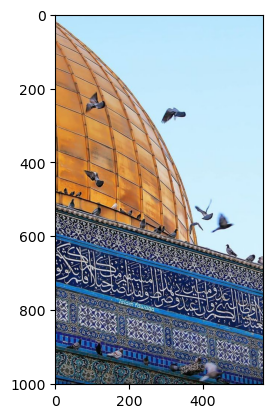

In [92]:
plp.imshow(image)

plp.show()

Ainsi, on peut effectuer de différents traitements à partir de cette représentation :

Dans le cas d'une image en couleur, on peut extraire chaque couleur de base (rouge, vert, bleu) en annulant les autres :

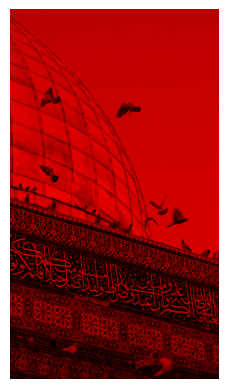

In [17]:
image_red = image.copy()   # création d'une copie

image_red[:,:,1:]=0

plp.imshow(image_red)
plp.axis("off")
plp.show()

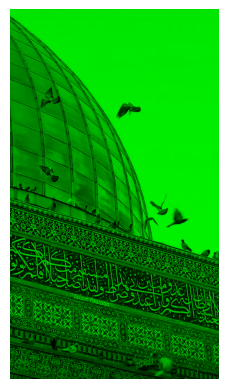

In [18]:
image_green = image.copy()

image_green[:,:,0]=0
image_green[:,:,2]=0

plp.imshow(image_green)
plp.axis("off")
plp.show()

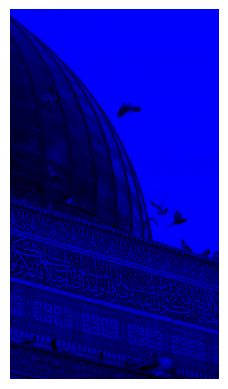

In [20]:
image_blue = image.copy()

image_blue[:,:,:2]=0

plp.imshow(image_blue)
plp.axis("off")
plp.show()

Extraire une partie de l'image (un sous tableau) :

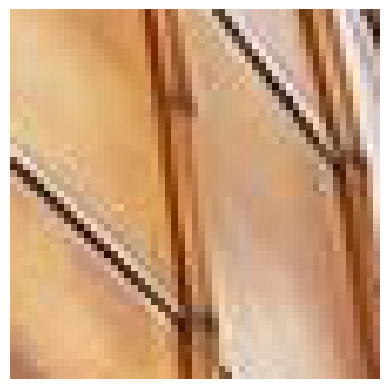

In [23]:
plp.imshow(image[500:555,300:355,:])
plp.axis("off")
plp.show()

## Histogramme

L'histogramme d'une image est la distribution des intensités de pixels en niveaux de gris ou par couleur de base. C'est à dire, on compte le nombre d'occurrence de chaque valeur entre 0 et 255 et on représente graphiquement le résultat ensuite.

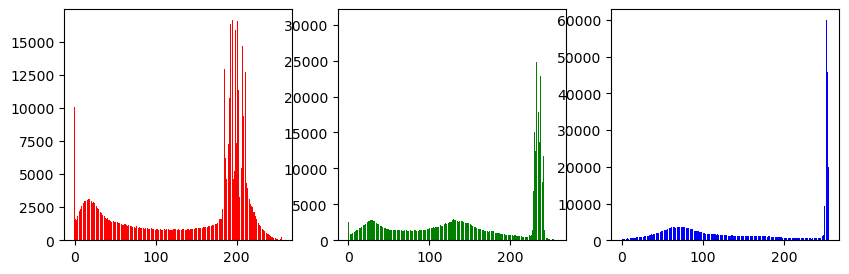

In [85]:
# image en couleur

def histogramme_couleur(image):
    red = np.zeros(256)
    green = np.zeros(256)
    blue = np.zeros(256)
    for line in image:
        for pixel in line:
            red[pixel[0]] += 1
            green[pixel[1]] += 1
            blue[pixel[2]] += 1
    
    plp.figure(figsize=(10, 3))
    plp.subplot(1,3,1)
    plp.bar(np.arange(256), red, color='red')
    plp.subplot(1,3,2)
    plp.bar(np.arange(256), green, color='green')
    plp.subplot(1,3,3)
    plp.bar(np.arange(256), blue, color='blue')
    
histogramme_couleur(image)

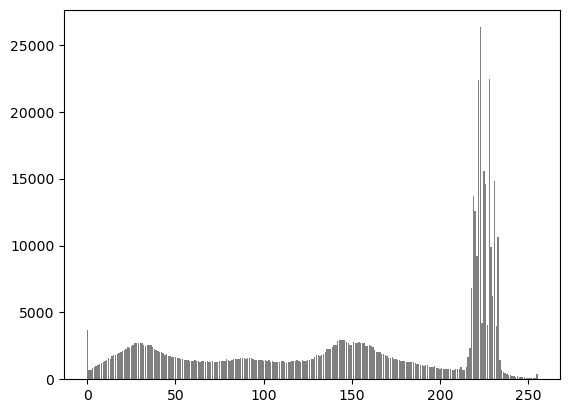

In [93]:
# image en niveau de gris

def histogramme_gris(image):
    gris = np.zeros(256)
    for line in image:
        for pixel in line:
            gris[pixel[0]] += 1
    
    plp.bar(np.arange(256), gris, color='gray')
    
image_grise = plp.imread('image_grise.jpg')
histogramme_gris(image_grise)

### Étalement d'histogramme

Pour améliorer le contraste d’une image on peut ajuster les niveaux de gris pour qu’ils occupent toute la plage possible (de 0 à 255).

Soit $[i_{min}, i_{max}]$, où $i_{min}$ représente la plus faible intensité et $i_{max}$ la plus forte. L’idée est de transformer la plage $[I_{min}, I_{max}]$ vers $[0,255]$ en utilisant :

$$i_{\acute{e}tal\acute{e}} = \frac{i_{originel}-i_{min}}{i_{max}-i_{min}} \times 255$$


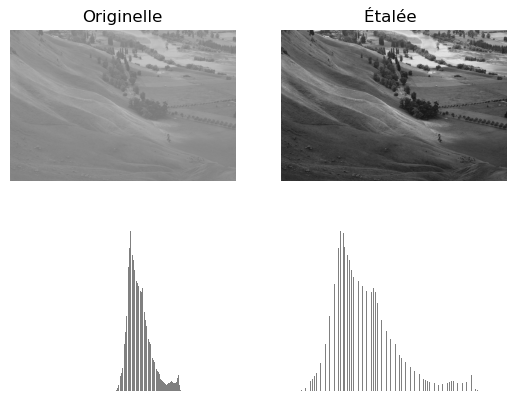

In [113]:
def étalement(image):
    imin = np.min(image)
    imax = np.max(image)
    return ((image-imin)*(255/(imax-imin))).astype(int)

image = plp.imread('image_nature.jpg')
plp.figure()

plp.subplot(2,2,1)
plp.imshow(image)
plp.title('Originelle')
plp.axis("off")

plp.subplot(2,2,2)
plp.imshow(étalement(image))
plp.title('Étalée ')
plp.axis("off")

plp.subplot(2,2,3)
histogramme_gris(image)
plp.axis("off")

plp.subplot(2,2,4)
histogramme_gris(étalement(image))
plp.axis("off")

plp.show()

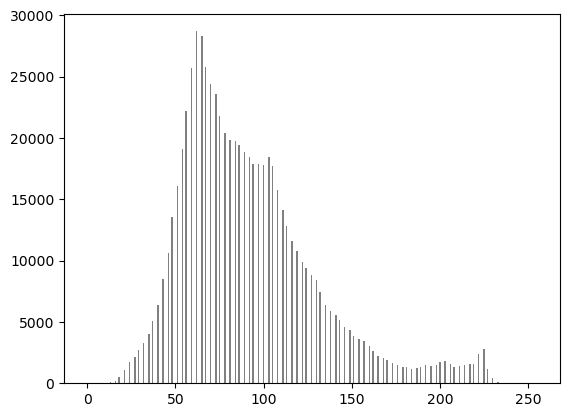

In [110]:
histogramme_gris(étalement(image))

## Image négative 

Créer une image négative consiste à inverser les couleurs de l’image. En termes simples :

$$Pixel_{n\acute{e}gatif} = 255 - Pixel_{originel}$$

In [45]:
def image_négative(image):
    return 255-image

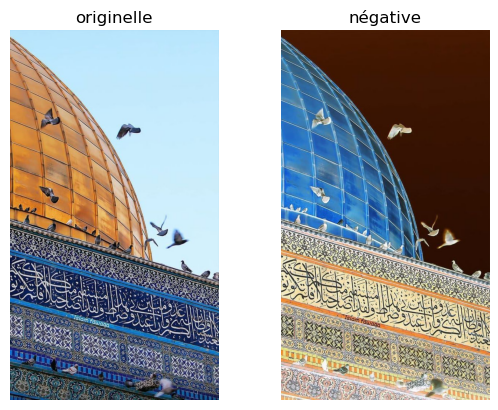

In [94]:
image = plp.imread('image.jpg')

plp.figure()

plp.subplot(1,2,1)
plp.imshow(image)
plp.title('originelle')
plp.axis("off")

plp.subplot(1,2,2)
plp.imshow(image_négative(image))
plp.title('négative')
plp.axis("off")

plp.show()

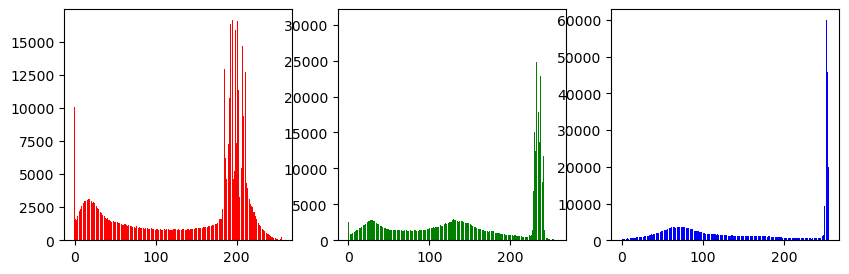

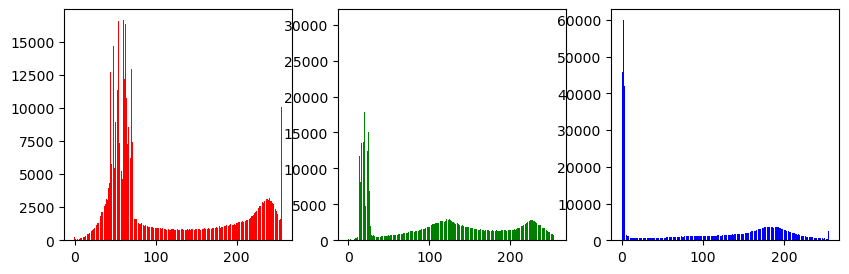

In [58]:
histogramme_couleur(image)
histogramme_couleur(image_négative(image))

## Conversion d'image en couleur en image en niveaux de gris

Pour calculer manuellement la valeur de chaque pixel en niveaux de gris (de 0 (noir) à 255 (blanc)) à partir d'un pixel en couleur on utilise une moyenne pondérée :

$$gris = 0,299 · rouge + 0,587 · vert + 0,114 · bleu$$

Cette formule tient compte de la sensibilité de l'œil humain aux différentes couleurs : on perçoit mieux le vert que le rouge ou le bleu.

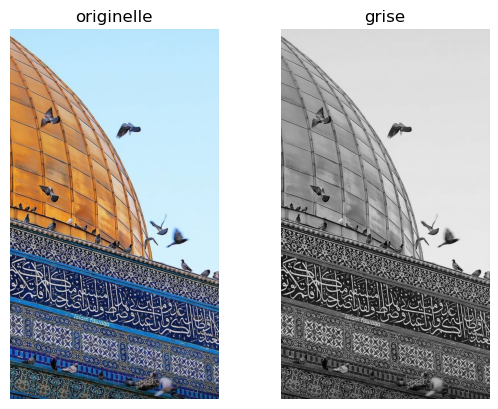

In [95]:
def gris(image):
    image_grise = np.zeros((image.shape[0],image.shape[1],3),dtype = np.uint8)
    for l in range(len(image_grise)):
        for c in range(len(image_grise[0])):
            image_grise[l, c] = np.full(3, int(0.299*image[l,c,0]+0.587*image[l,c,1]+0.114*image[l,c,2])%256)
    return image_grise      

image = plp.imread('image.jpg')

plp.figure()

plp.subplot(1,2,1)
plp.imshow(image)
plp.title('originelle')
plp.axis("off")

plp.subplot(1,2,2)
plp.imshow(gris(image))
plp.title('grise')
plp.axis("off")

plp.show()

## Luminosité

Pour changer de luminosité, il suffit d’ajouter une valeur fixe à tous les niveaux. Une valeur positive pour augmenter la luminosité (les couleurs tendent vers la couleur blanche) et une négative pour la diminuer (vers la noire).

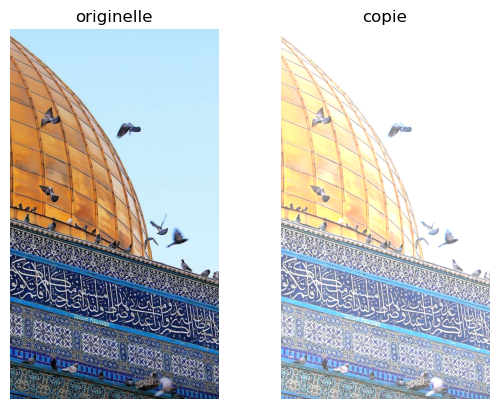

In [61]:
def luminosité(image, degré):
    image_copie = image.copy()
    for l in range(len(image_copie)):
        for c in range(len(image_copie[0])):
            for x in range(3):
                if image_copie[l, c, x]+degré>255:
                    image_copie[l, c, x]=255
                elif image_copie[l, c, x]+degré<0:
                    image_copie[l, c, x] = 0
                else:
                    image_copie[l, c, x] += degré
    return image_copie      
    
plp.figure()

plp.subplot(1,2,1)
plp.imshow(image)
plp.title('originelle')
plp.axis("off")

plp.subplot(1,2,2)
plp.imshow(luminosité(image, 100))
plp.title('copie')
plp.axis("off")

plp.show()

## Filtrage par produit de convolution

C'est une transformation mathématique définie par une matrice carrée d'ordre impair (masque) que l'on glisse sur chaque pixel central en remplaçant sa valeur par la somme des produits des valeurs des pixels voisins par les valeurs correspondantes dans la matrice.

Cette transformation est appliquée pour extraire certaines caractéristiques comme les bords ou pour réduire le bruit, ...

### Détection de contours

Lorsque l’on considère un contour comme une variation de l’intensité lumineuse, on pense tout naturellement à la dérivation pour déterminer les variations de l’image. Cette dérivation va annuler les zones de faibles variations (intensités uniformes) et renvoie de grandes valeurs lors de variations fortes (contours).

Parmi les filtres basés sur ce principe on trouve $Laplacien$ défini par:

$$\begin{bmatrix}
0 & -1 & 0\\
-1 & 4 & -1\\
0 & -1 & 0
\end{bmatrix}$$

In [63]:
def filtre(image, matrice):
    new_image = image.copy()
    for ligne in range(1, len(image)-1):
        for colonne in range(1, len(image[0])-1):
            
            x = image[ligne-1,colonne-1,0]*matrice[0,0]+image[ligne-1,colonne,0]*matrice[0,1]+image[ligne-1,colonne+1,0]*matrice[0,2]
            +image[ligne,colonne-1,0]*matrice[1,0]+image[ligne,colonne,0]*matrice[1,1]+image[ligne,colonne+1,0]*matrice[1,2]
            image[ligne+1,colonne-1,0]*matrice[2,0]+image[ligne+1,colonne,0]*matrice[2,1]+image[ligne+1,colonne+1,0]*matrice[2,2]
            
            
            new_image[ligne,colonne] = np.full(3, x)
    return new_image

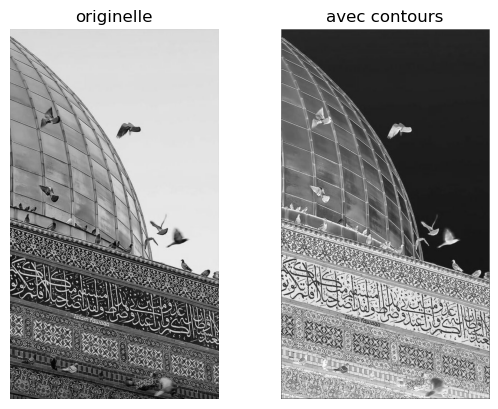

In [70]:
laplacien=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

image = plp.imread('image_grise.jpg')
    
plp.figure()

plp.subplot(1,2,1)
plp.imshow(image)
plp.title('originelle')
plp.axis("off")

plp.subplot(1,2,2)
plp.imshow(filtre(image, laplacien))
plp.title('avec contours')
plp.axis("off")

plp.show()

## Symétrie

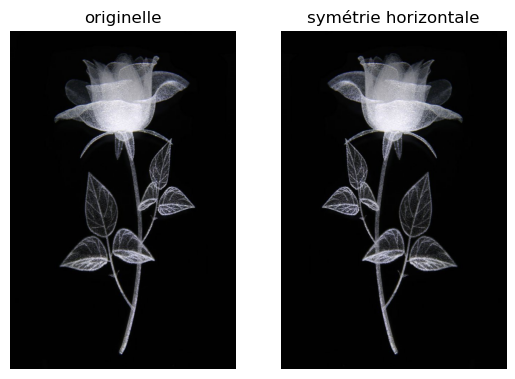

In [87]:
# horizontale

image = plp.imread('rose.jpg')

new_image = image[:,::-1]

plp.subplot(1,2,1)
plp.imshow(image)
plp.title('originelle')
plp.axis("off")

plp.subplot(1,2,2)
plp.imshow(new_image)
plp.title('symétrie horizontale')
plp.axis("off")

plp.show()

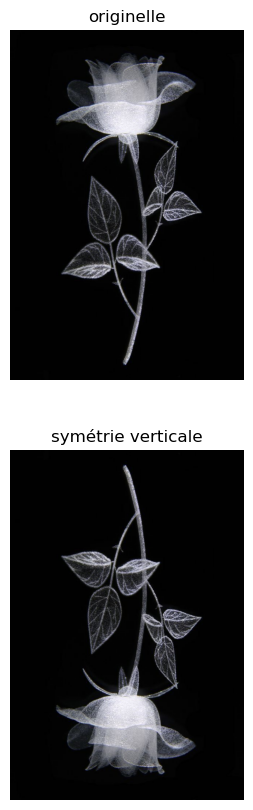

In [88]:
# verticale

image = plp.imread('rose.jpg')

new_image = image[::-1]

plp.figure(figsize=(10, 10))

plp.subplot(2,1,1)
plp.imshow(image)
plp.title('originelle')
plp.axis("off")

plp.subplot(2,1,2)
plp.imshow(new_image)
plp.title('symétrie verticale')
plp.axis("off")

plp.show()

## Rotation

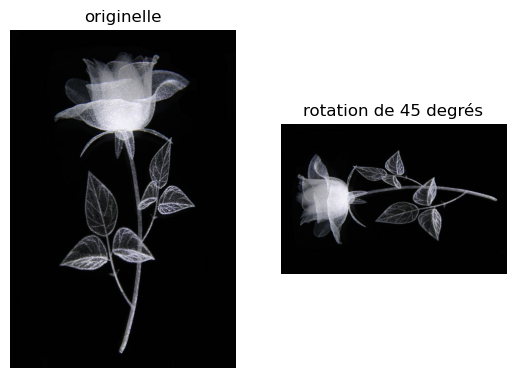

In [96]:
# rotation de pi/2 dans le sens trigonométrique 

def rotate(image):
    new_image = np.zeros((image.shape[1],image.shape[0], 3), dtype='uint8')
    for i in range(len(image)):
        #new_image[len(image)-i-1] = image[i]
        new_image[:,i] = image[i,::-1]
    return new_image

image = plp.imread('rose.jpg')

plp.subplot(1,2,1)
plp.imshow(image)
plp.title('originelle')
plp.axis("off")

plp.subplot(1,2,2)
plp.imshow(rotate(image))
plp.title('rotation de 45 degrés')
plp.axis("off")

plp.show()

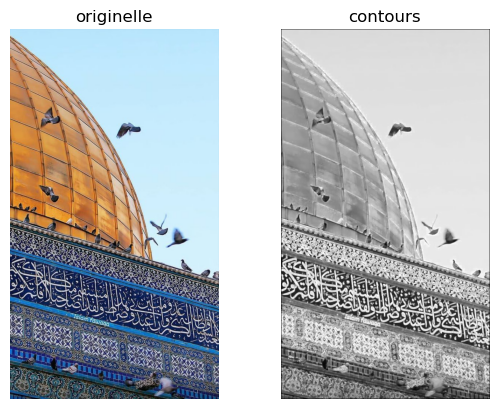

In [62]:
def dilatation(image):
    new_image = np.zeros(image.shape, dtype='uint8')
    for ligne in range(1, image.shape[0]-1):
        for colonne in range(1, image.shape[1]-1):
            maxi = np.max(image[ligne-1:ligne+2,colonne-1:colonne+2,0])
            new_image[ligne,colonne] = np.full(3,maxi)
    return new_image

image = plp.imread('image1.jpg')

plp.subplot(1,2,1)
plp.imshow(image)
plp.title('originelle')
plp.axis("off")

plp.subplot(1,2,2)
plp.imshow(dilatation(gris(image)))
plp.title('contours')
plp.axis("off")

plp.show()

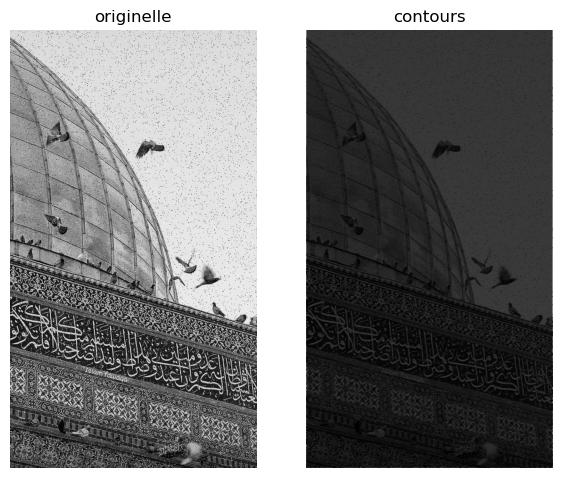

In [72]:
gaussien = np.array([[1,2,1],[2,4,2],[1,2,1]])/16

moyenneur = np.full((3,3),1/9)


image = plp.imread('image2.jpg')

plp.figure(figsize=(7, 7))

plp.subplot(1,2,1)
plp.imshow(image)
plp.title('originelle')
plp.axis("off")

plp.subplot(1,2,2)
plp.imshow(filtre(image, gaussien))
plp.title('contours')
plp.axis("off")

plp.show()

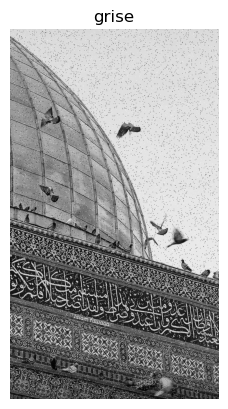

In [50]:
image = plp.imread('image1.jpg')

image=gris(image)
for _ in range(10000):
    x1 = np.random.randint(image.shape[0])
    x2 = np.random.randint(image.shape[1])
    image[x1,x2]=np.full(3,255)
    x1 = np.random.randint(image.shape[0])
    x2 = np.random.randint(image.shape[1])
    image[x1,x2]=np.full(3,0)
    
plp.imshow(image)
plp.title('grise')
plp.axis("off")
x = Image.fromarray(image)
x.save("your_file.jpg")